# **Santander_Coders: Projeto_transacoes_bancarias**


##### Participantes_Grupo6 : Natalia Camargo, Priscila Castro, Raphael Pacheco, Thais Telles e Victor Castro. 


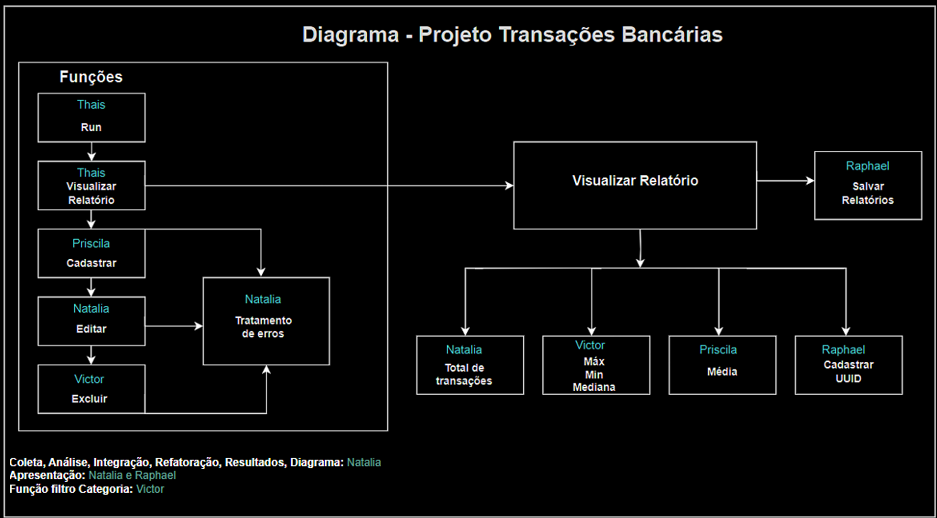











In [1]:
#Código Inicial
# dependencies
import json
import os
import uuid
import random
import sys

#load settings
sys.path.append(r'/Projeto_SantanderCoders_CRUD')
from data import settings

def criar_transacoes(num_transacoes, proporcao_categorias, seed=settings.seed):
    assert sum([proporcao_categorias[k] for k in proporcao_categorias])==1, '`proporcao_categorias` não soma 100%! Favor rever.'

    # garantir reprodutibilidade dos valores
    random.seed(seed)

    # Calcula o número de transações por categoria com base na proporção
    numero_transacoes_por_categoria = {categoria: int(num_transacoes * proporcao) for categoria, proporcao in proporcao_categorias.items()}
    
    transacoes = []
    
    # Gera as transações
    for categoria, quantidade in numero_transacoes_por_categoria.items():
        for _ in range(quantidade):
            transacao = {
                "UUID": str(uuid.uuid4()),
                "valor": round(random.uniform(1.0, 1000.0), 2),  # Preço aleatório entre 1 e 1000
                "categoria": categoria
            }
            transacoes.append(transacao)
    
    return transacoes

def salvar_json(transacoes, path2save, filename):
    # create path if not exist
    if not os.path.exists(path2save):
        os.makedirs(path2save)
    with open(os.path.join(path2save,filename), "w") as file:
        json.dump(transacoes, file, indent=4)
    print(f"Arquivo salvo em: {os.path.abspath(os.path.curdir)+'/'+path2save+'/'+filename}")

def criar_bd(num_transacoes:int = 10000, proporcao_categorias:list = settings.categorias_proporcao, path2save="./data", filename='transactions.json'):
    salvar_json(criar_transacoes(num_transacoes,  proporcao_categorias),
                path2save, filename
    )

def load_bd(filepath='./data/transactions.json'):
    with open(filepath, "r") as file:
        bd = json.load(file)
    return bd

def tela_inicial():
    print("\nBem-vindo <teu nome inteiro aqui>!")
    print('conta: 0000001-0')
    print("\nEste programa permite gerenciar transações de sua conta pessoal.")
    print("\nEscolha uma das opções abaixo:")
    print("1. Visualizar relatórios")
    print("2. Cadastrar transações")
    print("3. Editar transações")
    print("4. Excluir transações")
    print("-" * 10)
    print("0. Sair")
    print('\n')   

In [2]:
def run():
    """
    Função principal que controla o fluxo do programa.
    Exibe a tela inicial e aguarda a entrada do usuário para realizar as operações
    de visualizar relatórios, cadastrar, editar ou excluir transações, ou sair do programa.
    """
    while True:
        tela_inicial()  
        opcao = input("Escolha uma opção: ")

        # Dicionário de opções que mapeia entradas para funções correspondentes
        opcoes = {
            "1": visualizar_relatorios,
            "2": cadastrar_transacao,
            "3": editar_transacao_por_ID,
            "4": excluir_transacao,
            "0": lambda: print("Saindo do programa...")
        }

        # Verifica se a opção é válida e executa a função correspondente
        if opcao in opcoes:
            if opcao == "0":
                break  # Sai do loop e termina o programa
            else:
                opcoes[opcao]()  # Executa a função correspondente à opção escolhida
        else:
            print("Opção inválida! Tente novamente.") 
            print('\n') 

In [3]:
def visualizar_relatorios():
    while True:
        print("\nEscolha uma das opções de relatório:")
        print("1. Exibir soma total das transações")
        print("2. Exibir os Top 5 maiores valores")
        print("3. Exibir as Top 5 transações medianas")
        print("4. Exibir os Top 5 menores valores")
        print("5. Exibir média total das transações")
        print("6. Consultar transação por ID")
        print("0. Voltar ao menu principal")

        escolha = input("Digite o número da opção desejada:")
        print('\n')

        if escolha == '1':
            total = calcular_total_transacoes()
            print(f"Soma total das transações: R$ {total:.2f}")
        elif escolha == '2':
            mostrar_m5_transacoes('max')
        elif escolha == '3':
            mostrar_m5_transacoes('median')
        elif escolha == '4':
            mostrar_m5_transacoes('min')
        elif escolha == '5':
            media = calcular_media()
            print(f"Média total das transações: R$ {media:.2f}")
        elif escolha == '6':
            print(consultar_transacao_por_ID())
        elif escolha == '0':
            break
        else:
            print("Opção inválida! Tente novamente.")
            

In [4]:
def cadastrar_transacao():
    
    path2save="./data"
    filename='transactions.json'    
    
    categorias = {transacao["categoria"].lower() for transacao in bd}
    print(f"Categorias disponíveis: {', '.join(categorias)}")
    while True:
        #editar
        categoria_input = input("Digite a categoria da transação: ").strip().lower()
    
        if categoria_input not in categorias:
            print("valor precisa ser uma da opções informadas. Tente novamente.")
            break
        categoria = categoria_input
        valor_input = input("Digite o valor da transação: ").strip()
        if not is_numeric(valor_input):
            print("valor precisa ser numerico. Tente novamente.")
            break
        
        valor = float(valor_input)
        
        nova_transacao = {
            "UUID": str(uuid.uuid4()),  # Gera um novo UUID
            "valor": (valor),
            "categoria": categoria
        }     
        bd.append(nova_transacao)
        salvar_json(bd,path2save,filename)
        print(f"Transação cadastrada com sucesso! {nova_transacao['UUID']}")
        break

def is_numeric(value):
    try:
        float(value)  
        return True
    except ValueError:
        return False

In [5]:
def editar_transacao_por_ID():
    """
    Função para editar uma transação existente no banco de dados com base no UUID fornecido pelo usuário.
    A função permite ao usuário alterar a categoria e/ou o valor da transação selecionada.
    O JSON atualizado é salvo após a confirmação do usuário.
    """
    bd = load_bd()

    while True:
        uuid_para_editar = input("Digite o UUID da transação a ser editada: ")

        # Encontra a transação correspondente pelo UUID
        transacao_para_editar = next((trans for trans in bd if trans["UUID"] == uuid_para_editar), None)

        if transacao_para_editar is None:
            print("UUID não encontrado. Tente novamente.")
            continue  # Permite nova tentativa sem sair da função

        # Exibe as categorias disponíveis
        categorias = {transacao["categoria"].lower() for transacao in bd}
        print(f"Categorias disponíveis: {', '.join(categorias)}")
        
        # Entrada e validação da nova categoria
        categoria_input = input("Digite a nova categoria da transação (ou pressione Enter para manter): ").strip().lower()
        if categoria_input and categoria_input in categorias:
            transacao_para_editar['categoria'] = categoria_input

        # Entrada e validação do novo valor
        valor_input = input("Digite o novo valor da transação (ou pressione Enter para manter): ").strip()
        if valor_input and is_numeric(valor_input):
            transacao_para_editar['valor'] = float(valor_input)

        # Exibe as informações atualizadas da transação para confirmação
        print(f"Tem certeza que quer editar a transação com o UUID: {transacao_para_editar['UUID']}, "
              f"Valor: R$ {transacao_para_editar['valor']:.2f}, Categoria: {transacao_para_editar['categoria']}? (Sim/Não)")
        confirmacao = input().strip().lower()

        if confirmacao == 'sim':
            # Atualiza a transação no banco de dados
            for i, transacao in enumerate(bd):
                if transacao["UUID"] == uuid_para_editar:
                    bd[i] = transacao_para_editar
                    break
            
            # Salva o banco de dados atualizado
            salvar_json(bd, path2save='data/', filename='transactions.json')
            print("Transação editada com sucesso!")
            break
        elif confirmacao == 'não':
            print("Edição cancelada.")
            break
        else:
            print("Resposta inválida. Digite 'Sim' ou 'Não'.")

In [6]:
def excluir_transacao():
    bd = load_bd()

    while True:
        uuid_para_apagar = input("Digite o UUID da transação a ser excluída: ")

        # Encontra a transação correspondente
        transacao_para_excluir = next((trans for trans in bd if trans["UUID"] == uuid_para_apagar), None)

        if transacao_para_excluir is None:
            print("UUID não encontrado. Tente novamente.")
            break

        # Exibe as informações da transação para confirmação
        print(f"Tem certeza que quer excluir a transação com o UUID: {transacao_para_excluir['UUID']}, Valor: {transacao_para_excluir['valor']}, Categoria: {transacao_para_excluir['categoria']}? (Sim/Não)")
        confirmacao = input().strip().lower()
        if confirmacao == 'sim':
            # Filtra as transações para remover a que tem o UUID especificado
            transacoes_atualizadas = [trans for trans in bd if trans["UUID"] != uuid_para_apagar]
            
            # Salva o JSON atualizado de volta no arquivo
            salvar_json(transacoes_atualizadas, path2save='data/', filename='transactions.json')
            print("Transação excluída com sucesso!")
            break
        elif confirmacao == 'não':
            print("Exclusão cancelada.")
            break
        else:
            print("Resposta inválida. Digite 'Sim' ou 'Não'.")

In [7]:
def calcular_total_transacoes():
    bd = load_bd()
    
   # Extrair categorias únicas
    categorias = {transacao["categoria"].lower() for transacao in bd}
    print(f"Categorias disponíveis: {', '.join(categorias)}")

    # Solicita se deseja filtrar por categoria
    while True:
        por_categoria = input("Deseja filtrar por categoria? (sim ou não):").strip().lower()
        if por_categoria in ['sim', 'não']:
            if por_categoria == 'sim':
                while True:
                    categoria = input("Digite a categoria desejada:").strip().lower()
                    if categoria in categorias:
                        transacoes = [t for t in bd if t["categoria"].lower() == categoria]
                        break
                    else:
                        print("Categoria inválida. Tente novamente.")
            else:
                transacoes = bd
            break
        else:
            print("Resposta inválida. Tente novamente.")

    media = sum(t['valor'] for t in transacoes)
    return  round(media,2)

In [8]:
def mostrar_m5_transacoes(opcao): 
    bd = load_bd()

    # Extrair categorias únicas
    categorias = {transacao["categoria"].lower() for transacao in bd}
    print(f"Categorias disponíveis: {', '.join(categorias)}")

    # Solicita se deseja filtrar por categoria
    while True:
        por_categoria = input("Deseja filtrar por categoria? (sim ou não):").strip().lower()
        if por_categoria in ['sim', 'não']:
            if por_categoria == 'sim':
                while True:
                    categoria = input("Digite a categoria desejada:").strip().lower()
                    if categoria in categorias:
                        transacoes = [t for t in bd if t["categoria"].lower() == categoria]
                        break
                    else:
                        print("Categoria inválida. Tente novamente.")
            else:
                transacoes = bd
            break
        else:
            print("Resposta inválida. Tente novamente.")

    # Função auxiliar para mostrar transações top 5
    def top_5_transacoes(transacoes, chave, reverso=False):
        return sorted(transacoes, key=lambda x: x[chave], reverse=reverso)[:5]

    # Função auxiliar para calcular a mediana
    def calcular_mediana(valores):
        valores_ordenados = sorted(valores)
        n = len(valores_ordenados)
        meio = n // 2
        if n % 2 == 0:
            return (valores_ordenados[meio - 1] + valores_ordenados[meio]) / 2
        else:
            return valores_ordenados[meio]

    # Verifica a opção fornecida e processa
    if opcao == 'max':
        transacoes_top = top_5_transacoes(transacoes, 'valor', reverso=True)
    elif opcao == 'median':
        valores = [t['valor'] for t in transacoes]
        mediana = calcular_mediana(valores)
        transacoes_top = sorted(transacoes, key=lambda x: abs(x['valor'] - mediana))[:5]
    elif opcao == 'min':
        transacoes_top = top_5_transacoes(transacoes, 'valor')
    else:
        print("Opção inválida. A função será encerrada.")
        return

    print("Top 5 transações:")
    for transacao in transacoes_top:
        print(transacao)


In [9]:
def calcular_media():
    bd = load_bd()
    
    # Extrair categorias únicas
    categorias = {transacao["categoria"].lower() for transacao in bd}
    print(f"Categorias disponíveis: {', '.join(categorias)}")

    # Solicita se deseja filtrar por categoria
    while True:
        por_categoria = input("Deseja filtrar por categoria? (sim ou não):").strip().lower()
        if por_categoria in ['sim', 'não']:
            if por_categoria == 'sim':
                while True:
                    categoria = input("Digite a categoria desejada:").strip().lower()
                    if categoria in categorias:
                        transacoes = [t for t in bd if t["categoria"].lower() == categoria]
                        break
                    else:
                        print("Categoria inválida. Tente novamente.")
            else:
                transacoes = bd
            break
        else:
            print("Resposta inválida. Tente novamente.")

    media = sum(t['valor'] for t in transacoes) / len(categorias)
    return  round(media,2)

In [10]:
def consultar_transacao_por_ID():
    bd = load_bd()
    
    uuid_procurado = input("Digite o id da transação que deseja: ")

    try:
        
        # Procura a transação com o UUID especificado
        for transacao in bd:
            if transacao.get('UUID') == uuid_procurado: 
                return transacao
        print(f"transação não encontrada {uuid_procurado}")
        return None
    
    except FileNotFoundError:
        return "Arquivo transactions.json não encontrado."
    except json.JSONDecodeError:
        return "Erro ao decodificar o arquivo JSON."

In [11]:
def salvar_relatorio(consulta, relatorio):
    with open('relatorio.txt', 'w') as arquivo:
    # Adiciona uma nova linha ao final do arquivo
        arquivo.write(f"Consulta realizada [{consulta}]\n")
        if isinstance(relatorio, list):
            arquivo.write(json.dumps(relatorio, indent=4))
        else:
            arquivo.write(relatorio)
        arquivo.write(" ")


In [12]:
# MAIN SCRIPT
# -----------------------
# não alterar nada abaixo
if __name__ == "__main__":
    
    # -----------------------
    # NÃO ALTERAR ESTE BLOCO
    # -----------------------
    # criar o banco de dados caso ele não exista
    print(os.path.abspath('.'))
    if not os.path.exists('./data/transactions.json'):
        criar_bd()
    
    # load bd 
    bd = load_bd()
    # -----------------------

    # -----------------------
    # ABAIXO PODE ALTERAR
    # -----------------------
    #limpar console (opcional)
    os.system('cls' if os.name == 'nt' else 'clear')
    # inicia o programa
    run()

c:\Users\victo\OneDrive\Documents\GitHub\Projeto_SantanderCoders_CRUD\notebook

Bem-vindo <teu nome inteiro aqui>!
conta: 0000001-0

Este programa permite gerenciar transações de sua conta pessoal.

Escolha uma das opções abaixo:
1. Visualizar relatórios
2. Cadastrar transações
3. Editar transações
4. Excluir transações
----------
0. Sair


